### Getting the camera working

Here are some steps needed. First you need to enable the camera. In a terminal type `sudo raspi-config` and then use the arrow keys to select interface options and then enable the camera. A reboot is required.

Next we need to install the picamera Python modulg. In a terminal type the command

`sudo apt-get install python3-picamera`

Because the red led on the camera creates light inside the spectrometer, we can turn it off by adding this line in `/boot/config.txt` and rebooting

`disable_camera_led=1`

That's it.

In [1]:
import numpy as np
import io
import ipywidgets as widgets

from picamera import PiCamera
from PIL import Image, ImageDraw
from time import sleep, strftime
from IPython.display import clear_output

### Routine `takePicture()`

To make things easy, we define a routine to take an image with the Raspberry Pi Camera. The camera you have has a maximum resolution of 2592 x 1944 pixels. The options are set for the spectrometer setup. Note we rotate the image 270 degrees.

In [2]:
def takePicture(shutter):
    
    print("Initialising camera")
    camera = PiCamera()
    stream = io.BytesIO()
    try:
        # Full camera resolution is 2592 x 1944 - we run at 1/4 resolution 
        camera.resolution = (648, 486)        
        camera.framerate= 5
        camera.rotation = 270
        camera.iso = 800
        camera.shutter_speed = shutter
        camera.awb_mode = 'off'
        camera.awb_gains = (1, 1)

        print("Allowing camera to warmup")
        sleep(1)
        print("Capturing image")

        camera.capture(stream, format='jpeg')
        stream.seek(0)
        raw = Image.open(stream)
    finally:
        camera.close()
    return raw

### Trying it out

Now let's capture an image and display it. Note that the argument shutter specifies the time to expose the image in micro-seconds - so 1,000,000 is one second. the maximum exposure the camera can do is 6,000,000 or 6 seconds.

Initialising camera
Allowing camera to warmup
Capturing image


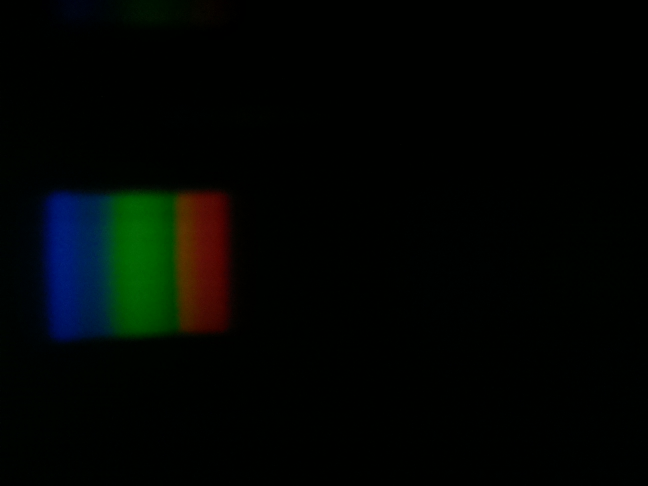

In [7]:
shutter = 100000
image = takePicture(shutter)

image  # This will show the captured image

If you see an image - woohoo 🎉🥳. You connected the camera correctly and the code is working. Try different exposure times.